In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [2]:
df_raw = pd.read_csv('crypto_prices.csv')

In [5]:
df_raw.set_index("dtime", inplace = True)
df_raw = df_raw.reindex(index=df_raw.index[::-1])
#df_raw = df_raw.drop(columns = ['time'])

In [6]:
df_raw.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-10-13,6192.2,6219.1,6171.7,6197.9,6199.6,922.828331,3614,8.735380,8.727730,8.732240,...,52.84,53.88,52.42,52.84,53.02,5258.671260,668,3.986759,3.959288,3.970669
2018-10-14,6197.9,6289.9,6150.0,6181.8,6226.9,1237.100596,5098,8.746700,8.724207,8.736634,...,52.84,53.35,50.85,51.14,52.07,5024.065251,625,3.976874,3.928880,3.952589
2018-10-15,6181.9,6820.0,6151.0,6438.5,6449.8,11345.747326,28535,8.827615,8.724370,8.771804,...,51.14,58.09,50.86,53.48,53.71,38150.198318,3528,4.061994,3.929077,3.983599
2018-10-16,6438.5,6490.0,6391.5,6460.4,6441.8,3270.364601,8233,8.778018,8.762724,8.770563,...,53.48,54.19,52.54,53.10,53.35,11349.662323,702,3.992496,3.961575,3.976874
2018-10-17,6460.3,6469.8,6411.9,6442.5,6438.4,1683.992001,5375,8.774900,8.765911,8.770035,...,53.10,53.22,52.30,52.93,52.69,4882.802936,605,3.974434,3.956996,3.964426


In [7]:
df_copy = df_raw.copy()

In [8]:
df_copy.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-10-13,6192.2,6219.1,6171.7,6197.9,6199.6,922.828331,3614,8.735380,8.727730,8.732240,...,52.84,53.88,52.42,52.84,53.02,5258.671260,668,3.986759,3.959288,3.970669
2018-10-14,6197.9,6289.9,6150.0,6181.8,6226.9,1237.100596,5098,8.746700,8.724207,8.736634,...,52.84,53.35,50.85,51.14,52.07,5024.065251,625,3.976874,3.928880,3.952589
2018-10-15,6181.9,6820.0,6151.0,6438.5,6449.8,11345.747326,28535,8.827615,8.724370,8.771804,...,51.14,58.09,50.86,53.48,53.71,38150.198318,3528,4.061994,3.929077,3.983599
2018-10-16,6438.5,6490.0,6391.5,6460.4,6441.8,3270.364601,8233,8.778018,8.762724,8.770563,...,53.48,54.19,52.54,53.10,53.35,11349.662323,702,3.992496,3.961575,3.976874
2018-10-17,6460.3,6469.8,6411.9,6442.5,6438.4,1683.992001,5375,8.774900,8.765911,8.770035,...,53.10,53.22,52.30,52.93,52.69,4882.802936,605,3.974434,3.956996,3.964426


In [9]:
df_copy.isna().sum()

open_BTC        0
high_BTC        0
low_BTC         0
close_BTC       0
vwap_BTC        0
volume_BTC      0
count_BTC       0
log_high_BTC    0
log_low_BTC     0
log_vwap_BTC    0
open_ETH        0
high_ETH        0
low_ETH         0
close_ETH       0
vwap_ETH        0
volume_ETH      0
count_ETH       0
log_high_ETH    0
log_low_ETH     0
log_vwap_ETH    0
open_LTC        0
high_LTC        0
low_LTC         0
close_LTC       0
vwap_LTC        0
volume_LTC      0
count_LTC       0
log_high_LTC    0
log_low_LTC     0
log_vwap_LTC    0
dtype: int64

---

### Data Preprocessing

In [10]:
# Creating daily returns columns for daily VWAP return
df_copy['BTC_daily_return'] = df_copy['vwap_BTC'].pct_change()
df_copy['ETH_daily_return'] = df_copy['vwap_ETH'].pct_change()
df_copy['LTC_daily_return'] = df_copy['vwap_LTC'].pct_change()

In [11]:
# Doing a log transformation of daily returns column for daily VWAP return
df_copy['BTC_log_vwap_return'] = df_copy['log_vwap_BTC'].pct_change()
df_copy['ETH_log_vwap_return'] = df_copy['log_vwap_ETH'].pct_change()
df_copy['LTC_log_vwap_return'] = df_copy['log_vwap_LTC'].pct_change()

In [12]:
# Creating a test split
# Talk to Blake about this.

'''
Choice depends on how you set up target

Non-trivial.


'''
# Split for Time-Series modeling, use a train_test_split for the regregression
size = int(len(df_copy) * 0.8)

In [13]:
df = df_copy.iloc[:size]

In [14]:
df_test = df_copy.iloc[size:]

In [15]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC,BTC_daily_return,ETH_daily_return,LTC_daily_return,BTC_log_vwap_return,ETH_log_vwap_return,LTC_log_vwap_return
dtime,,,,,,,,,,,,,,,,,,,,,
2018-10-13,6192.2,6219.1,6171.7,6197.9,6199.6,922.828331,3614,8.735380,8.727730,8.732240,...,668,3.986759,3.959288,3.970669,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-14,6197.9,6289.9,6150.0,6181.8,6226.9,1237.100596,5098,8.746700,8.724207,8.736634,...,625,3.976874,3.928880,3.952589,0.004404,-0.006953,-0.017918,0.000503,-0.001321,-0.004553
2018-10-15,6181.9,6820.0,6151.0,6438.5,6449.8,11345.747326,28535,8.827615,8.724370,8.771804,...,3528,4.061994,3.929077,3.983599,0.035796,0.044667,0.031496,0.004026,0.008282,0.007846
2018-10-16,6438.5,6490.0,6391.5,6460.4,6441.8,3270.364601,8233,8.778018,8.762724,8.770563,...,702,3.992496,3.961575,3.976874,-0.001240,0.000049,-0.006703,-0.000141,0.000009,-0.001688
2018-10-17,6460.3,6469.8,6411.9,6442.5,6438.4,1683.992001,5375,8.774900,8.765911,8.770035,...,605,3.974434,3.956996,3.964426,-0.000528,-0.003326,-0.012371,-0.000060,-0.000626,-0.003130


In [16]:
df_test.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC,BTC_daily_return,ETH_daily_return,LTC_daily_return,BTC_log_vwap_return,ETH_log_vwap_return,LTC_log_vwap_return
dtime,,,,,,,,,,,,,,,,,,,,,
2020-05-11,8716.5,9175.0,8190.0,8570.8,8700.5,18291.827689,49333,9.124238,9.010669,9.071136,...,1944,3.759338,3.673258,3.717953,0.001508,-0.021585,-0.020690,0.000166,-0.004161,-0.005592
2020-05-12,8570.8,8975.0,8531.8,8823.7,8779.9,7354.103412,22313,9.102198,9.051556,9.080220,...,1125,3.757939,3.722072,3.742183,0.009126,0.022601,0.024526,0.001001,0.004279,0.006517
2020-05-13,8823.7,9411.0,8808.1,9317.1,9117.1,9472.110878,27926,9.149634,9.083427,9.117907,...,892,3.778720,3.739335,3.760269,0.038406,0.034497,0.018251,0.004150,0.006467,0.004833
2020-05-14,9317.1,9947.0,9256.9,9788.5,9632.3,12966.020534,37987,9.205026,9.133124,9.172877,...,1242,3.792113,3.743368,3.775057,0.056509,0.026463,0.014898,0.006029,0.004948,0.003933
2020-05-15,9788.5,9847.1,9128.0,9312.1,9476.7,11077.654457,35216,9.194932,9.119102,9.156591,...,991,3.788046,3.734808,3.764219,-0.016154,-0.015648,-0.010780,-0.001775,-0.002973,-0.002871


Text(0, 0.5, 'VWAP ($)')

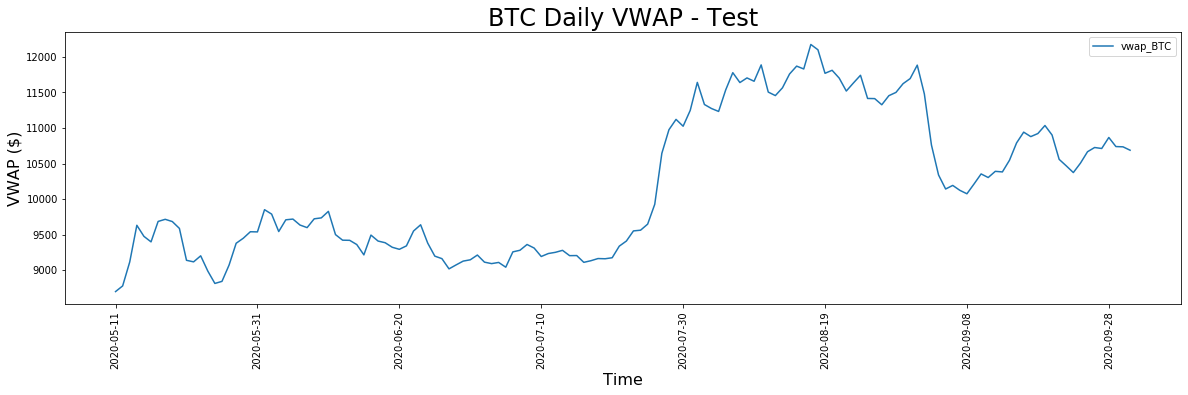

In [17]:
df_test.plot(y=['vwap_BTC'], figsize = (20, 5))
plt.title('BTC Daily VWAP - Test', size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation = 90)
plt.ylabel("VWAP ($)", size = 16)

Text(0, 0.5, 'VWAP ($)')

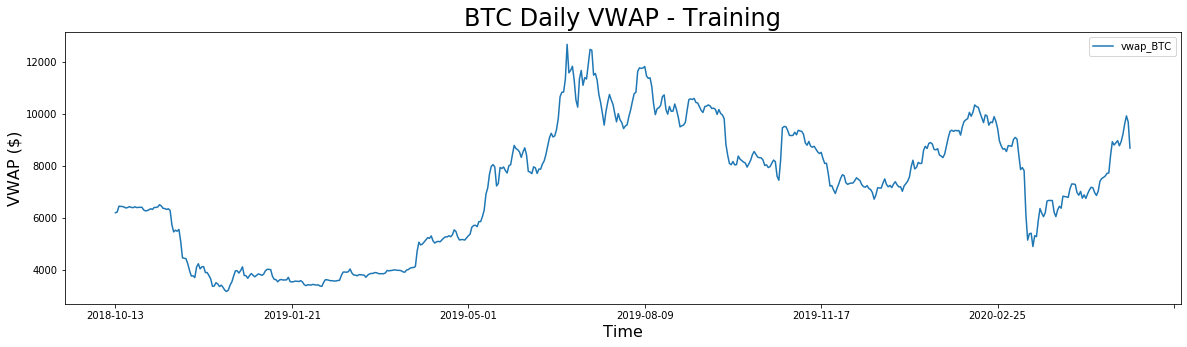

In [18]:
df.plot(y=['vwap_BTC'], figsize=(20, 5))
plt.title("BTC Daily VWAP - Training", size = 24)
plt.xlabel("Time", size = 16)
plt.ylabel("VWAP ($)", size = 16)

---

## Time-Series tests before modeling

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

Test different Bitcoin series and returns for stationarity.

In [26]:
sts.adfuller(df['vwap_BTC'])

(-1.585490557344349,
 0.4908778753587304,
 3,
 572,
 {'1%': -3.441834071558759,
  '5%': -2.8666061267054626,
  '10%': -2.569468095872659},
 7712.914887742388)

In [27]:
sts.adfuller(df['log_vwap_BTC'])

(-1.3599561670655649,
 0.6013160657572709,
 3,
 572,
 {'1%': -3.441834071558759,
  '5%': -2.8666061267054626,
  '10%': -2.569468095872659},
 -2241.0753377132223)

Bitcoin high and log_high prices are non-stationary. We'll need an integrated model if we're going to forecast

### ETH tests for stationarity.

In [28]:
sts.adfuller(df['vwap_ETH'])

(-2.9917337663384416,
 0.03567360686719971,
 13,
 562,
 {'1%': -3.442039359113542,
  '5%': -2.8666965134862514,
  '10%': -2.5695162601790758},
 3770.7904483001266)

We can reject the null hypothesis at 5% significance, thus time series is stationary.

In [29]:
sts.adfuller(df['log_vwap_ETH'])

(-2.379055192845863,
 0.14773539175406836,
 8,
 567,
 {'1%': -3.441935806025943,
  '5%': -2.8666509204896093,
  '10%': -2.5694919649816947},
 -2014.398768513995)

Fail to reject null hypothesis on log_vwap_ETH at 5%.

If test statistic is < critical value, we can reject H0 at that level of significance.

https://machinelearningmastery.com/time-series-data-stationary-python/

## LTC tests for stationarity

In [30]:
sts.adfuller(df['vwap_LTC'])

(-1.765666224335389,
 0.39763569586445713,
 13,
 562,
 {'1%': -3.442039359113542,
  '5%': -2.8666965134862514,
  '10%': -2.5695162601790758},
 2710.653147218805)

Fail to reject H0

In [31]:
sts.adfuller(df['log_vwap_LTC'])

(-1.6651487349653655,
 0.44915238914777933,
 4,
 571,
 {'1%': -3.4418542752662518,
  '5%': -2.8666150225357914,
  '10%': -2.569472836146374},
 -1923.2085801483731)

Fail to reject H0

### Checking Returns for Stationarity

#### BTC daily and log daily returns

In [33]:
sts.adfuller(df_copy['BTC_daily_return'][1:])

(-13.511750068810803,
 2.844436744300932e-25,
 2,
 716,
 {'1%': -3.439516060164992,
  '5%': -2.8655850998755263,
  '10%': -2.5689240826597173},
 -2929.3539175892597)

In [34]:
sts.adfuller(df_copy['BTC_log_vwap_return'][1:])

(-13.380732145056772,
 4.98396244316169e-25,
 2,
 716,
 {'1%': -3.439516060164992,
  '5%': -2.8655850998755263,
  '10%': -2.5689240826597173},
 -5965.050310489711)

Both tests returned p-values below 0.05 indicating they BTC daily and log daily returns are stationary and white noise.

#### ETH daily and log daily returns

In [35]:
sts.adfuller(df_copy['ETH_daily_return'][1:])

(-9.598714100281528,
 1.9465696497588713e-16,
 7,
 711,
 {'1%': -3.439580754053961,
  '5%': -2.865613606467485,
  '10%': -2.568939269723711},
 -2617.6761747553205)

In [36]:
sts.adfuller(df_copy['ETH_log_vwap_return'][1:])

(-9.58961444037714,
 2.0527647509343458e-16,
 7,
 711,
 {'1%': -3.439580754053961,
  '5%': -2.865613606467485,
  '10%': -2.568939269723711},
 -4895.172198867682)

Both are stationary.

#### LTC daily and log daily returns

In [37]:
sts.adfuller(df_copy['LTC_daily_return'][1:])

(-13.841400750331408,
 7.281260914912836e-26,
 2,
 716,
 {'1%': -3.439516060164992,
  '5%': -2.8655850998755263,
  '10%': -2.5689240826597173},
 -2520.8626415942304)

In [38]:
sts.adfuller(df_copy['LTC_log_vwap_return'][1:])

(-11.37661053635313,
 8.714318853911398e-21,
 4,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 -4429.785845688006)

Both are statistically significant at all levels indiciating stationarity.

---

## Auto Arima models for prices, daily returns.

In [20]:
from pmdarima.arima import auto_arima

### BTC

In [41]:
model_BTC = auto_arima(df_copy['vwap_BTC'])

In [42]:
model_BTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -4939.256
Date:                Mon, 05 Oct 2020   AIC                           9884.512
Time:                        16:32:18   BIC                           9898.245
Sample:                             0   HQIC                          9889.814
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3113      0.020     15.234      0.000       0.271       0.351
ma.L2         -0.0743      0.026     -2.822      0.005      -0.126      -0.023
sigma2      5.475e+04   1337.650     40.932      0.000    5.21e+04    5.74e+04
===================================================================================
Ljung-Box (Q):                       32.60   Jarque-Bera (JB):              1894.85
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX Model with (0, 1, 2) is actually ARIMA(0, 1, 2) since no seasonal pattern or exogenous variables.

In [43]:
model_BTC_daily_returns = auto_arima(df_copy['BTC_daily_return'][1:])

In [44]:
model_BTC_daily_returns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  719
Model:               SARIMAX(1, 0, 1)   Log Likelihood                1521.361
Date:                Mon, 05 Oct 2020   AIC                          -3036.722
Time:                        16:34:42   BIC                          -3022.988
Sample:                             0   HQIC                         -3031.419
                                - 719                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2106      0.069     -3.069      0.002      -0.345      -0.076
ma.L1          0.5459      0.062      8.776      0.000       0.424       0.668
sigma2         0.0009   2.17e-05     39.195      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       29.57   Jarque-Bera (JB):              1358.05
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.09
Prob(H) (two-sided):                  0.25   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Returns a simple ARMA(1, 1) model

### ETH modeling

In [45]:
model_ETH = auto_arima(df_copy['vwap_ETH'])

C:\Users\pam\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:75: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


In [46]:
model_ETH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -2479.665
Date:                Mon, 05 Oct 2020   AIC                           4967.329
Time:                        16:38:15   BIC                           4985.641
Sample:                             0   HQIC                          4974.399
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3338      0.023     14.555      0.000       0.289       0.379
ma.L2         -0.0224      0.026     -0.860      0.390      -0.073       0.029
ma.L3          0.0702      0.026      2.665      0.008       0.019       0.122
sigma2        57.9422      1.643     35.256      0.000      54.721      61.163
===================================================================================
Ljung-Box (Q):                       54.62   Jarque-Bera (JB):               845.42
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looks like ARIMA(0, 1, 3) model.

In [47]:
model_ETH_ret = auto_arima(df_copy['ETH_daily_return'][1:])

C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespa

In [48]:
model_ETH_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  719
Model:               SARIMAX(2, 0, 3)   Log Likelihood                1363.942
Date:                Mon, 05 Oct 2020   AIC                          -2715.883
Time:                        16:40:01   BIC                          -2688.416
Sample:                             0   HQIC                         -2705.279
                                - 719                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9213      0.117      7.884      0.000       0.692       1.150
ar.L2         -0.6790      0.122     -5.565      0.000      -0.918      -0.440
ma.L1         -0.6231      0.113     -5.503      0.000      -0.845      -0.401
ma.L2          0.3366      0.110      3.062      0.002       0.121       0.552
ma.L3          0.3247      0.039      8.318      0.000       0.248       0.401
sigma2         0.0013   4.29e-05     30.888      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       42.34   Jarque-Bera (JB):               549.43
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.35
Prob(H) (two-sided):                  0.67   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Threw out some weird warnings about non-stationary time series and model not converging.

Ended with ARMA(2, 3) model.

### LTC Models

In [49]:
model_LTC = auto_arima(df_copy['vwap_LTC'])

C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihoo

In [50]:
model_LTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1674.338
Date:                Mon, 05 Oct 2020   AIC                           3362.676
Time:                        16:42:19   BIC                           3394.721
Sample:                             0   HQIC                          3375.048
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8508      0.050     36.722      0.000       1.752       1.950
ar.L2         -1.4926      0.073    -20.315      0.000      -1.637      -1.349
ar.L3          0.6438      0.051     12.533      0.000       0.543       0.744
ar.L4         -0.2591      0.025    -10.186      0.000      -0.309      -0.209
ma.L1         -1.5811      0.047    -33.475      0.000      -1.674      -1.488
ma.L2          0.8556      0.047     18.399      0.000       0.764       0.947
sigma2         6.1650      0.174     35.480      0.000       5.824       6.506
===================================================================================
Ljung-Box (Q):                       58.64   Jarque-Bera (JB):              1503.76
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(4, 1, 2)

In [51]:
model_LTC_ret = auto_arima(df_copy['LTC_daily_return'][1:])

C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters f

In [52]:
model_LTC_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  719
Model:               SARIMAX(2, 0, 3)   Log Likelihood                1313.647
Date:                Mon, 05 Oct 2020   AIC                          -2615.293
Time:                        16:44:13   BIC                          -2587.826
Sample:                             0   HQIC                         -2604.689
                                - 719                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6602      0.135     -4.876      0.000      -0.926      -0.395
ar.L2         -0.7654      0.118     -6.479      0.000      -0.997      -0.534
ma.L1          0.9712      0.141      6.876      0.000       0.694       1.248
ma.L2          0.8965      0.150      5.973      0.000       0.602       1.191
ma.L3          0.1683      0.064      2.639      0.008       0.043       0.293
sigma2         0.0015   4.66e-05     32.638      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       28.49   Jarque-Bera (JB):               945.34
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARMA(2, 3) model for LTC returns.

---

Try forecasting tomorrow, see how that turns out.

---

Granger's causality Test <- LOOK THIS UP

Test's H0 that the cofficients of past values in regression equation = 0.

Past values of time series (x) do not cause the other series (Y). If p-value from test is < 0.05 => safely reject the null hypothesis.

Cointegration Test - helps establish the presence of a statistically significant connection between two or more time series.

Basic Premise VAR is based on.

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/



---

###  Vector Autoregression Model for Returns.

The Auto_Arima model was used to individually evaluate the different assets and their returns. The VAR model will see how they influence each other. Key difference between VAR and AR, ARMA, and ARIMA models is that it is bi-directional. Each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. VAR Model requires time series you want to forecast to be stationary.

In [21]:
from statsmodels.tsa.api import VAR

In [22]:
df_ret = df_copy[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']][1:]

In [23]:
model_var_ret = VAR(df_ret)

C:\Users\pam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [24]:
model_var_ret.select_order(20)

In [25]:
results_var_ret = model_var_ret.fit(ic='aic')

In [26]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Oct, 2020
Time:                     13:19:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -22.2022
Nobs:                     714.000    HQIC:                  -22.3909
Log likelihood:           5044.53    FPE:                1.67589e-10
AIC:                     -22.5095    Det(Omega_mle):     1.56810e-10
--------------------------------------------------------------------
Results for equation BTC_daily_return
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.000907         0.001094            0.829           0.407
L1.BTC_daily_return         0.236771         0.069224            3.420           0.001
L1.ETH_daily_return      

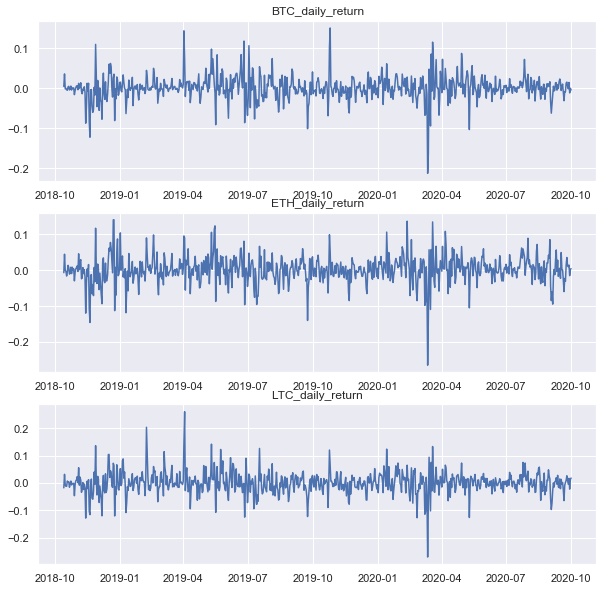

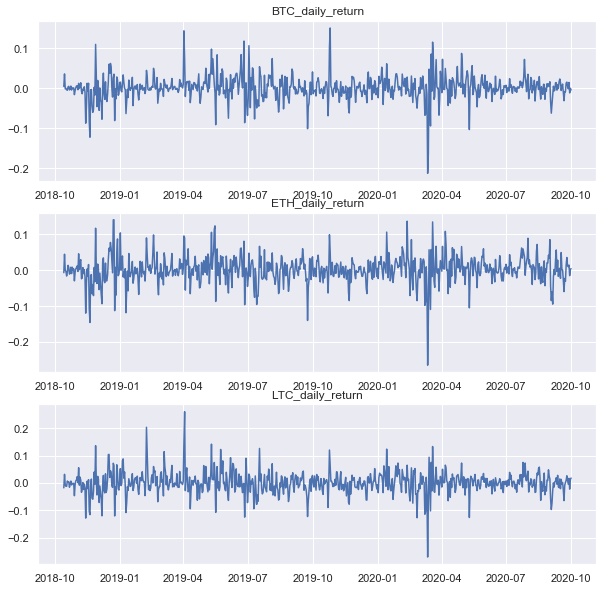

In [27]:
results_var_ret.plot()

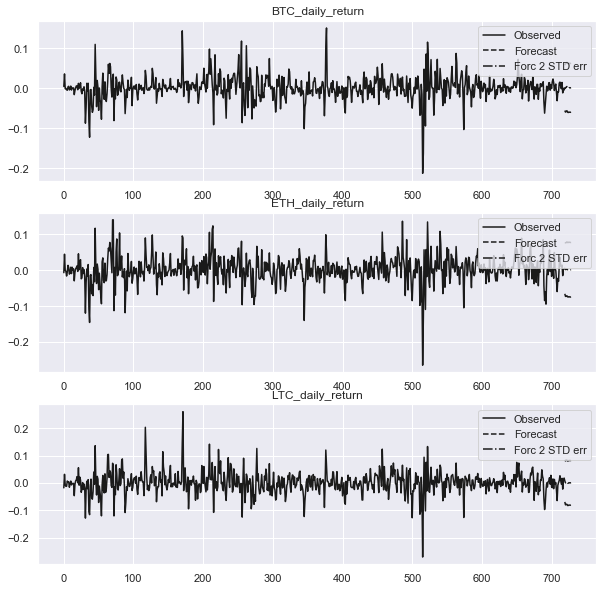

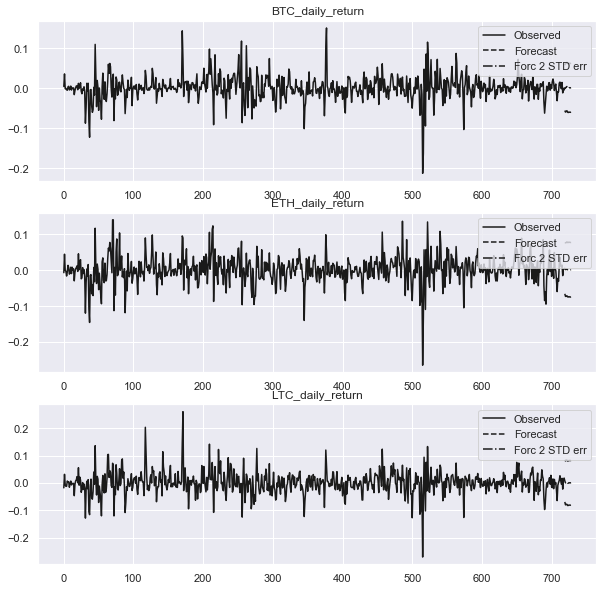

In [29]:
results_var_ret.plot_forecast(10)

## Other Regression Models for Price / Returns

In [30]:
df_copy.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC,BTC_daily_return,ETH_daily_return,LTC_daily_return,BTC_log_vwap_return,ETH_log_vwap_return,LTC_log_vwap_return
dtime,,,,,,,,,,,,,,,,,,,,,
2018-10-13,6192.2,6219.1,6171.7,6197.9,6199.6,922.828331,3614,8.735380,8.727730,8.732240,...,668,3.986759,3.959288,3.970669,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-14,6197.9,6289.9,6150.0,6181.8,6226.9,1237.100596,5098,8.746700,8.724207,8.736634,...,625,3.976874,3.928880,3.952589,0.004404,-0.006953,-0.017918,0.000503,-0.001321,-0.004553
2018-10-15,6181.9,6820.0,6151.0,6438.5,6449.8,11345.747326,28535,8.827615,8.724370,8.771804,...,3528,4.061994,3.929077,3.983599,0.035796,0.044667,0.031496,0.004026,0.008282,0.007846
2018-10-16,6438.5,6490.0,6391.5,6460.4,6441.8,3270.364601,8233,8.778018,8.762724,8.770563,...,702,3.992496,3.961575,3.976874,-0.001240,0.000049,-0.006703,-0.000141,0.000009,-0.001688
2018-10-17,6460.3,6469.8,6411.9,6442.5,6438.4,1683.992001,5375,8.774900,8.765911,8.770035,...,605,3.974434,3.956996,3.964426,-0.000528,-0.003326,-0.012371,-0.000060,-0.000626,-0.003130


In [31]:
prices = df_copy[['vwap_BTC', 'vwap_ETH', 'vwap_LTC']]
prices.head()

,vwap_BTC,vwap_ETH,vwap_LTC
dtime,,,
2018-10-13,6199.6,197.04,53.02
2018-10-14,6226.9,195.67,52.07
2018-10-15,6449.8,204.41,53.71
2018-10-16,6441.8,204.42,53.35
2018-10-17,6438.4,203.74,52.69


In [36]:
X, y = prices[['vwap_BTC', 'vwap_LTC']], prices[['vwap_ETH']]

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [39]:
reg = LinearRegression().fit(X_train, y_train)

In [40]:
reg.score(X_test, y_test)

0.6273875044705204

In [41]:
reg.coef_

array([[0.02190229, 0.17690487]])

In [42]:
reg.intercept_

array([18.85808731])

Now trying with ETH and LTC as target variables.

In [43]:
X, y = prices[['vwap_BTC']], prices[['vwap_LTC', 'vwap_ETH']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [45]:
reg2 = LinearRegression().fit(X_train, y_train)

In [46]:
reg2.score(X_test, y_test)

C:\Users\pam\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5713647522468397

In [47]:
reg2.coef_

array([[0.00439193],
       [0.02267924]])

In [48]:
reg2.intercept_

array([23.77341577, 23.06372036])

---

### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [50]:
rf = RandomForestRegressor()

In [51]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [10, 20, 50],
    'max_depth': [10, 20, 25],
}

In [52]:
X, y = prices[['vwap_BTC']], prices[['vwap_LTC', 'vwap_ETH']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [54]:
grid_search= GridSearchCV(estimator = rf, param_grid = param_grid,
                         cv = 3, n_jobs = -1)

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [56]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 500}

In [57]:
rand_for = RandomForestRegressor(max_depth = 10,
                                min_samples_split = 50,
                                n_estimators = 500)

In [58]:
rand_for.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
rand_for.score(X_test, y_test)

C:\Users\pam\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.6670654792541127